YlGnBu-8
8 colors palette
    1. #ffffd9
    2. #edf8b1
    3. #c7e9b4
    4. #7fcdbb
    5. #41b6c4
    6. #1d91c0
    7. #225ea8
    8. #0c2c84

Touch frequency kiss last week
Touch frequency put arm around shoulder last week
Touch frequency intimate hug last week

How often have you and your partner touched each other in this way in the last week?

From Yvonee

Key predictors of higher touch frequency were
1. higher Relationship Satisfaction
2. more positive communication
3. shorter relationship duration
4. the absence of children
5. living together
6. younger age


In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
from statannotations.Annotator import Annotator

pd.options.mode.chained_assignment = None
warnings.filterwarnings('ignore')

In [2]:
# Read data (output from FReDA_Touch_genVariables_final.do)
df = pd.read_csv('source/FReDA.csv')

In [3]:
df['Id'] = np.arange(1, df.shape[0] + 1)
df.insert(0, 'Id', df.pop('Id'))

In [4]:
# Variables to map columns
# New values could be assigned as 'in-between' values to ease plotting and calculations
overall_options = {
    'index_options': {
        '0x': 0,
        '1-5x': 1,
        '6-10x': 2,
        '11-20x': 3,
        '21-50x': 4,
        '> 50x': 5
    },
    'omo_options': {
        'Not at all': 0,
        '1 to 5 times': 1,
        '6 to 10 times': 2,
        '11 to 20 times': 3,
        '21 to 50 times': 4,
        'More than 50 times': 5
    },
    'satisfaction_options': {
        '0 - Not at all satisfied': 0,
        '1': 2,
        '2': 2,
        '3': 4,
        '4': 4,
        '5': 6,
        '6': 6,
        '7': 8,
        '8': 8,
        '9': 10,
        '10 - Completely satisfied': 10
    },
    'duration_options': {
        '0-2': 1,
        '3-5': 2,
        '6-10': 3,
        '11-20': 4,
        '21+': 5,
    },
    'kids_options': {
        '0': 0,
        '1': 1,
        '2': 2,
        '3+': 3,
    },
    'Loneliness_options': {
        '1 - Not at all': 1,
        '2': 2,
        '3': 3,
        '4': 4,
        '5 - Absolutely': 5
    },
    'cohabitation-options': {
        'Cohabiting': 1,
        'Separate households': 2,
    },
    'work-options': {
        'Home': 0,
        'Part-time activity': 1,
        'Full time activity': 2,
    },
    'rel_sex-options': {
        'Different sex': 0,
        'Same sex': 1
    },
    'germany-options': {
        'East Germany': 0,
        'West Germany': 1,
    },
    'urbanization-options': {
        'Rural area': 0,
        'Town or suburb': 1,
        'City': 2,
    },
    'married-options': {
        'Not married': 0,
        'Married': 1,
    },
    'age_diff_options': {
        '> 10y. older partner': 3,
        '> 10y. younger partner': -3,
        '2-5y. older partner': 2,
        '2-5y. younger partner': -2,
        '6-10y. older partner': 1,
        '6-10y. younger partner': -1,
        'Same age': 0
    }
}

In [5]:
col_names = {
    # TOUCH-RELATED
    'omo15i1_w2b': 'Anchor Kiss Frequency',
    'omo15i2_w2b': 'Anchor Kiss Wish',
    'pomo15i1_w2b': 'Partner Kiss Frequency',
    'pomo15i2_w2b': 'Partner Kiss Wish',
    'omo16i1_w2b': 'Anchor Hold Frequency',
    'omo16i2_w2b': 'Anchor Hold Wish',
    'pomo16i1_w2b': 'Partner Hold Frequency',
    'pomo16i2_w2b': 'Partner Hold Wish',
    'omo17i1_w2b': 'Anchor Hug Frequency',
    'omo17i2_w2b': 'Anchor Hug Wish',
    'pomo17i1_w2b': 'Partner Hug Frequency',
    'pomo17i2_w2b': 'Partner Hug Wish',

    # SOCIODEMOGRAPHICS
    'sex': 'Anchor Sex',  # Female, Male, Diverse
    'psex': 'Partner Sex',  # Female, Male, Diverse
    'age': 'Anchor Age',
    'page': 'Partner Age',
    'workst': 'Anchor Work Status',  # Full-time activity, Part-time activity, Home
    'pworkst': 'Partner Work Status',  # Full-time activity, Part-time activity, Home
    'east': 'Anchor East',
    'peast': 'Partner East',
    'degurba': 'Anchor Urbanization',
    'pdegurba': 'Partner Urbanization',

    #PERSONALITY
    'extr': 'Anchor Extraversion',
    'pextr': 'Partner Extraversion',
    'agree': 'Anchor Agreeableness',
    'pagree': 'Partner Agreeableness',
    'consc': 'Anchor Conscientiousness',
    'pconsc': 'Partner Conscientiousness',
    'open': 'Anchor Openess',
    'popen': 'Partner Openess',
    'neur': 'Anchor Neuroticism',
    'pneur': 'Partner Neuroticism',
    'consv': 'Anchor Conservatism',
    'pconsv': 'Partner Conservatism',
    'god': 'Anchor Religiosity',
    'pgod': 'Partner Religiosity',

    #WELLBEING
    'depr': 'Anchor Depressiveness',
    'pdepr': 'Partner Depressiveness',
    'loneliness': 'Anchor Loneliness',
    'ploneliness': 'Partner Loneliness',
    'self': 'Anchor Self-esteem',
    'pself': 'Partner Self-esteem',
    'lifsat': 'Anchor Life Satisfaction',
    'plifsat': 'Partner Life Satisfaction',
    'health': 'Anchor Health',
    'phealth': 'Partner Health',

    #RELATIONSHIP
    'samesex': 'Relationship Sex',
    'reldur_class': 'Relationship Length',
    'married': 'Married',
    'cohab': 'Cohabitation',
    'nkidsliv_class': 'Kids',
    'relint': 'Anchor Communication Quality',
    'prelint': 'Partner Communication Quality',
    'relsat': 'Anchor Relationship Satisfaction',
    'prelsat': 'Partner Relationship Satisfaction',
    'confm': 'Anchor Conflict Management',
    'pconfm': 'Partner Conflict Management',
    'agediff_class': 'Age difference',
}

# Rename columns to ease understanding
df = df.rename(
    columns=col_names
)

In [6]:
df = df.drop([
    'reldur', 'tf_kiss', 'ptf_kiss', 'tf_hold', 'tf_hug', 'ptf_kiss', 'ptf_hold', 'ptf_hug'], axis=1).reset_index(
    drop=True)

In [7]:
n = df['Id'].count()
print('Initial sample size =', n)

Initial sample size = 7100


In [8]:
df = df.replace('No answer', np.nan, regex=True)
print(df.isna().mean() * 100)

Id                                    0.000000
Anchor Age                            0.000000
Partner Age                           0.000000
Anchor Work Status                    1.112676
Partner Work Status                   1.169014
Anchor Sex                            0.000000
Partner Sex                           0.000000
Relationship Sex                      0.000000
Relationship Length                   2.140845
Cohabitation                          0.000000
Kids                                  0.084507
Anchor Relationship Satisfaction      0.112676
Partner Relationship Satisfaction     0.070423
Anchor Communication Quality          3.760563
Partner Communication Quality        16.112676
Anchor Kiss Frequency                 0.000000
Anchor Hold Frequency                 0.000000
Anchor Hug Frequency                  0.000000
Anchor Kiss Wish                      2.352113
Anchor Hold Wish                      2.112676
Anchor Hug Wish                       1.971831
Partner Kiss 

"The three scales "Intimacy" [Intimität], "Apreciation" [Wertschätzung], and "Conflict" [Konflikt] were adapted from the "Network of Relationships Inventory (NRI)" (Furman & Buhrmester, 1985) and used in an abbreviated form and adapted by pairfam and Freda (Hank et al. 2024)."

(more detailed: In contrast to the original version of the NRI, the questions in this version were asked only concerning the relationship with the partner, and not to any other persons with whom the respondent has a relationship. Furthermore, to limit the volume of data collected, the individual scales have been shortened from three to two items each. The response format has five stages, as did the original, but in this version they reflect frequency (1=Never to 5=Very frequently).)

In [9]:
# Map target columns
# This will change categorical values such as '0-2' or '3-5' to numerical values: 1,2,3,etc...
df['Anchor Relationship Satisfaction'] = df['Anchor Relationship Satisfaction'].map(
    overall_options["satisfaction_options"])
df['Partner Relationship Satisfaction'] = df['Partner Relationship Satisfaction'].map(
    overall_options["satisfaction_options"])
df['Anchor Life Satisfaction'] = df['Anchor Life Satisfaction'].map(overall_options["satisfaction_options"])
df['Partner Life Satisfaction'] = df['Partner Life Satisfaction'].map(overall_options["satisfaction_options"])

df['Anchor Kiss Frequency'] = df['Anchor Kiss Frequency'].map(overall_options["omo_options"])
df['Anchor Hold Frequency'] = df['Anchor Hold Frequency'].map(overall_options["omo_options"])
df['Anchor Hug Frequency'] = df['Anchor Hug Frequency'].map(overall_options["omo_options"])
df['Anchor Kiss Wish'] = df['Anchor Kiss Wish'].map(overall_options["omo_options"])
df['Anchor Hold Wish'] = df['Anchor Hold Wish'].map(overall_options["omo_options"])
df['Anchor Hug Wish'] = df['Anchor Hug Wish'].map(overall_options["omo_options"])

df['Partner Kiss Frequency'] = df['Partner Kiss Frequency'].map(overall_options["omo_options"])
df['Partner Hold Frequency'] = df['Partner Hold Frequency'].map(overall_options["omo_options"])
df['Partner Hug Frequency'] = df['Partner Hug Frequency'].map(overall_options["omo_options"])
df['Partner Kiss Wish'] = df['Partner Kiss Wish'].map(overall_options["omo_options"])
df['Partner Hold Wish'] = df['Partner Hold Wish'].map(overall_options["omo_options"])
df['Partner Hug Wish'] = df['Partner Hug Wish'].map(overall_options["omo_options"])

df['Relationship Length'] = df['Relationship Length'].map(overall_options["duration_options"])
df['Kids'] = df['Kids'].map(overall_options['kids_options'])

df['Anchor Loneliness'] = df['Anchor Loneliness'].map(overall_options['Loneliness_options'])
df['Partner Loneliness'] = df['Partner Loneliness'].map(overall_options['Loneliness_options'])

df['Cohabitation'] = df['Cohabitation'].map(overall_options['cohabitation-options'])

df['Anchor Work Status'] = df['Anchor Work Status'].map(overall_options['work-options'])
df['Partner Work Status'] = df['Partner Work Status'].map(overall_options['work-options'])

df['Anchor East'] = df['Anchor East'].map(overall_options['germany-options'])
df['Partner East'] = df['Partner East'].map(overall_options['germany-options'])

df['Anchor Urbanization'] = df['Anchor Urbanization'].map(overall_options['urbanization-options'])
df['Partner Urbanization'] = df['Partner Urbanization'].map(overall_options['urbanization-options'])

df['Married'] = df['Married'].map(overall_options['married-options'])

df['Relationship Sex'] = df['Relationship Sex'].map(overall_options['rel_sex-options'])

df['Age difference'] = df['Age difference'].map(overall_options['age_diff_options'])

In [10]:
# Group anchor and partner by Age
for i in range(0, len(df)):
    if df['Anchor Age'][i] <= 20:
        df.loc[i, 'Anchor Age group'] = 1
    elif 20 < df['Anchor Age'][i] <= 30:
        df.loc[i, 'Anchor Age group'] = 2
    elif 30 < df['Anchor Age'][i] <= 40:
        df.loc[i, 'Anchor Age group'] = 3
    elif 40 < df['Anchor Age'][i] <= 50:
        df.loc[i, 'Anchor Age group'] = 4
    elif 50 < df['Anchor Age'][i]:
        df.loc[i, 'Anchor Age group'] = 5

for i in range(0, len(df)):
    if df['Partner Age'][i] <= 20:
        df.loc[i, 'Partner Age group'] = 1
    elif 20 < df['Partner Age'][i] <= 30:
        df.loc[i, 'Partner Age group'] = 2
    elif 30 < df['Partner Age'][i] <= 40:
        df.loc[i, 'Partner Age group'] = 3
    elif 40 < df['Partner Age'][i] <= 50:
        df.loc[i, 'Partner Age group'] = 4
    elif 50 < df['Partner Age'][i]:
        df.loc[i, 'Partner Age group'] = 5

In [11]:
# Calculate mean Frequency
df['Anchor Frequency of Touch'] = (df[['Anchor Kiss Frequency', 'Anchor Hold Frequency', 'Anchor Hug Frequency']].
                                   mean(axis=1))
df['Partner Frequency of Touch'] = (df[['Partner Kiss Frequency', 'Partner Hold Frequency', 'Partner Hug Frequency']].
                                    mean(axis=1))

# Calculate mean Wish
df['Anchor Wish for Touch'] = (df[['Anchor Kiss Wish', 'Anchor Hold Wish', 'Anchor Hug Wish']].
                               mean(axis=1))
df['Partner Wish for Touch'] = (df[['Partner Kiss Wish', 'Partner Hold Wish', 'Partner Hug Wish']].
                                mean(axis=1))

# Calculate individual differences
df['Anchor Kiss Difference'] = df['Anchor Kiss Wish'] - df['Anchor Kiss Frequency']
df['Anchor Hold Difference'] = df['Anchor Hold Wish'] - df['Anchor Hold Frequency']
df['Anchor Hug Difference'] = df['Anchor Hug Wish'] - df['Anchor Hug Frequency']

df['Partner Kiss Difference'] = df['Partner Kiss Wish'] - df['Partner Kiss Frequency']
df['Partner Hold Difference'] = df['Partner Hold Wish'] - df['Partner Hold Frequency']
df['Partner Hug Difference'] = df['Partner Hug Wish'] - df['Partner Hug Frequency']

In [12]:
df2 = df.copy()
# df2 = df2.dropna().reset_index(drop=True)
col_names = [
    'Anchor Kiss Frequency',
    'Anchor Kiss Wish',
    'Partner Kiss Frequency',
    'Partner Kiss Wish',
    'Anchor Hold Frequency',
    'Anchor Hold Wish',
    'Partner Hold Frequency',
    'Partner Hold Wish',
    'Anchor Hug Frequency',
    'Anchor Hug Wish',
    'Partner Hug Frequency',
    'Partner Hug Wish',
]
df2 = df2.dropna(subset=col_names).reset_index(drop=True)

df2 = df2[(df2['Anchor Age'] != -7) & (df['Partner Age'] != -7)].reset_index(drop=True)

In [13]:
n = df2['Id'].count()
print('Working sample size =', n)

Working sample size = 6799


In [14]:
def clean_touch_values(series):
    return np.where(
        (series > 0) & (series < 1), 1,
        np.where((series < 0) & (series > -1), -1, np.round(series))
    )


col_names = [
    'Anchor Frequency of Touch',
    'Partner Frequency of Touch',
    'Anchor Wish for Touch',
    'Partner Wish for Touch'
]

for col in col_names:
    df2[col] = clean_touch_values(df2[col])

In [15]:
df2['Anchor Difference of Touch'] = df2['Anchor Wish for Touch'] - df2['Anchor Frequency of Touch']
df2['Partner Difference of Touch'] = df2['Partner Wish for Touch'] - df2['Partner Frequency of Touch']

In [16]:
df2["Anchor Deprivation of Touch"] = 0
df2["Anchor Saturation of Touch"] = 0
df2["Partner Deprivation of Touch"] = 0
df2["Partner Saturation of Touch"] = 0
df2["Anchor Perception of Touch"] = "Just Enough"
df2["Partner Perception of Touch"] = "Just Enough"

temp1 = df2["Anchor Difference of Touch"]

df2.loc[temp1 > 0, "Anchor Deprivation of Touch"] = temp1[temp1 > 0]
df2.loc[temp1 > 0, "Anchor Perception of Touch"] = "Deprived"

df2.loc[temp1 < 0, "Anchor Saturation of Touch"] = temp1[temp1 < 0]
df2.loc[temp1 < 0, "Anchor Perception of Touch"] = "Saturated"

temp2 = df2["Partner Difference of Touch"]

df2.loc[temp2 > 0, "Partner Deprivation of Touch"] = temp2[temp2 > 0]
df2.loc[temp2 > 0, "Partner Perception of Touch"] = "Deprived"

df2.loc[temp2 < 0, "Partner Saturation of Touch"] = temp2[temp2 < 0]
df2.loc[temp2 < 0, "Partner Perception of Touch"] = "Saturated"

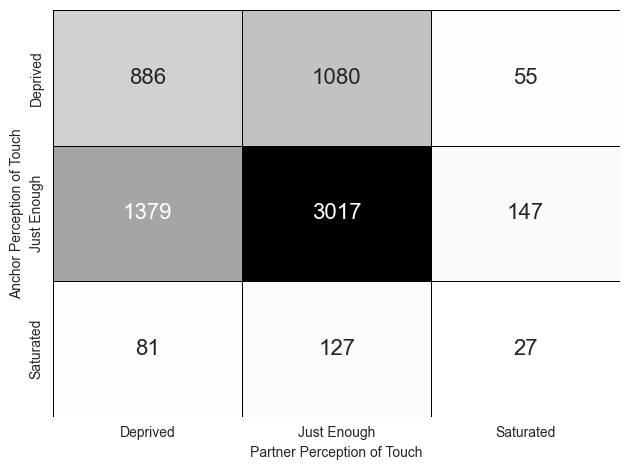

In [17]:
df2['Anchor Perception of Touch'] = pd.Categorical(df2['Anchor Perception of Touch'],
                                                   categories=['Deprived', 'Just Enough', 'Saturated'], ordered=True)
df2['Partner Perception of Touch'] = pd.Categorical(df2['Partner Perception of Touch'],
                                                    categories=['Deprived', 'Just Enough', 'Saturated'], ordered=True)

crosstab = pd.crosstab(df2['Anchor Perception of Touch'], df2['Partner Perception of Touch'])

greys_high_contrast = sns.color_palette("Greys", as_cmap=True)
sns.heatmap(
    data=crosstab,
    annot=True,
    cmap=greys_high_contrast,
    fmt='d',
    cbar=False,
    annot_kws={"fontsize": 16},
    linewidths=0.5,
    linecolor='black',
)

plt.tight_layout()
# plt.savefig("output/img_bg/correlation/perception of touch.png", dpi=350, transparent=False, bbox_inches='tight')
plt.show()

In [18]:
def compute_discrepancy(target, anchor_col, partner_col, new_col):
    diff = target[anchor_col] - target[partner_col]
    target[new_col] = np.select(
        condlist=[
            diff == 0,
            diff > 2,
            diff > 0,
            diff < -2,
            diff < 0
        ],
        choicelist=[0, 2, 1, -2, -1],
        default=np.nan
    )


compute_discrepancy(df2, 'Anchor Frequency of Touch', 'Partner Frequency of Touch', 'Frequency Discrepancy')
compute_discrepancy(df2, 'Anchor Wish for Touch', 'Partner Wish for Touch', 'Wish Discrepancy')
compute_discrepancy(df2, 'Anchor Kiss Frequency', 'Partner Kiss Frequency', 'Kiss Discrepancy')
compute_discrepancy(df2, 'Anchor Hold Frequency', 'Partner Hold Frequency', 'Hold Discrepancy')
compute_discrepancy(df2, 'Anchor Hug Frequency', 'Partner Hug Frequency', 'Hug Discrepancy')

In [19]:
# # Calculate means for touch variables
# for i in range(0, len(df2)):
#     if df2['Anchor Frequency of Touch'][i] == 0:
#         df2.loc[i, 'Anchor Given (count)'] = '0x'
#     if 0 < df2['Anchor Frequency of Touch'][i] <= 1:
#         df2.loc[i, 'Anchor Given (count)'] = '1-5x'
#     if 1 < df2['Anchor Frequency of Touch'][i] <= 2:
#         df2.loc[i, 'Anchor Given (count)'] = '6-10x'
#     if 2 < df2['Anchor Frequency of Touch'][i] <= 3:
#         df2.loc[i, 'Anchor Given (count)'] = '11-20x'
#     if 3 < df2['Anchor Frequency of Touch'][i] <= 4:
#         df2.loc[i, 'Anchor Given (count)'] = '21-50x'
#     if 4 < df2['Anchor Frequency of Touch'][i] <= 5:
#         df2.loc[i, 'Anchor Given (count)'] = '> 50x'

In [20]:
bins = [-float('inf'), 12, 17, 22, 26, float('inf')]
labels = [1, 2, 3, 4, 5]

cols_to_bin = ['Anchor Communication Quality', 'Partner Communication Quality']

for col in cols_to_bin:
    df2[col] = pd.cut(
        df2[col],
        bins=bins,
        labels=labels,
        right=True
    )

In [21]:
desired_order = {5: 'More than 50 times',
                 4: '21 to 50 times',
                 3: '11 to 20 times',
                 2: '6 to 10 times',
                 1: '1 to 5 times',
                 0: "Not at all"}

colors = ["#1d91c0", "#41b6c4", "#7fcdbb", "#a1dab4", "#ffffd9", "#253494"]
reversed_colors = colors[::-1]

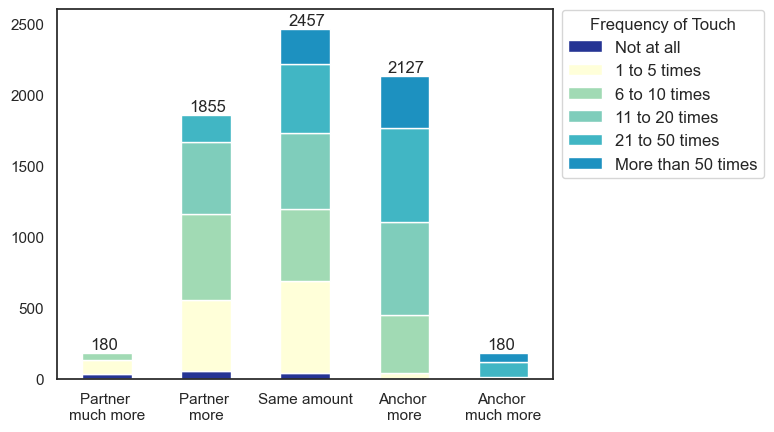

In [22]:
sns.set_theme(style='white')
ct = pd.crosstab(df2['Frequency Discrepancy'], df2['Anchor Frequency of Touch'])
ct.rename(desired_order, axis='columns', inplace=True)

ax = ct.plot(kind='bar', stacked=True, rot=0, color=reversed_colors)
# ax = ct.plot(kind='bar',
#              stacked=True,
#              edgecolor='black',
#              linewidth=1.5,
#              figsize=(8, 5),
#              color=['white', 'white', 'white'])
#
# hatches = ['/', '||', '-', 'xx', '..', 'o']
#
# for i, bar_container in enumerate(ax.containers):
#     for patch in bar_container.patches:
#         patch.set_hatch(hatches[i % len(hatches)])
#         patch.set_edgecolor('black')
#         patch.set_linewidth(1)
#         patch.set_facecolor('white')

ax.legend(title='Frequency of Touch', bbox_to_anchor=(1, 1.02), loc='upper left', fontsize=12)

a = df2.value_counts("Frequency Discrepancy").sort_index()

for i, label in enumerate(list(a)):
    ax.annotate(str(label), (i - 0.17, label + 30))

labels = ["Partner \nmuch more",
          "Partner \nmore",
          "Same amount",
          "Anchor \nmore",
          "Anchor \nmuch more"
          ]

plt.xticks(range(5), labels=labels, rotation=0)
plt.xlabel("")
plt.ylim([0, 2600])
plt.grid(False)
#
# plt.savefig('output/img_bg/comparisons/anchor_frequency_of_touch.png', dpi=350, transparent=False, bbox_inches='tight')
plt.show()

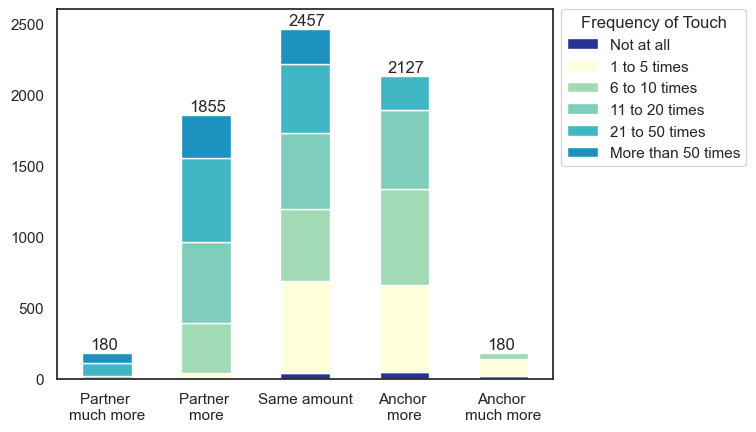

In [23]:
sns.set_theme(style='white')
ct = pd.crosstab(df2['Frequency Discrepancy'], df2['Partner Frequency of Touch'])
ct.rename(desired_order, axis='columns', inplace=True)

ax = ct.plot(kind='bar', stacked=True, rot=0, color=reversed_colors)
ax.legend(title='Frequency of Touch', bbox_to_anchor=(1, 1.02), loc='upper left')

a = df2.value_counts("Frequency Discrepancy").sort_index()

for i, label in enumerate(list(a)):
    ax.annotate(str(label), (i - 0.17, label + 30))

labels = ["Partner \nmuch more",
          "Partner \nmore",
          "Same amount",
          "Anchor \nmore",
          "Anchor \nmuch more"
          ]

plt.xticks(range(5), labels=labels)
plt.xlabel("")
plt.ylim([0, 2600])
plt.grid(False)
#
# plt.savefig('output/img_bg/comparisons/partner_frequency_of_touch.png', dpi=350, transparent=False, bbox_inches='tight')
plt.show()

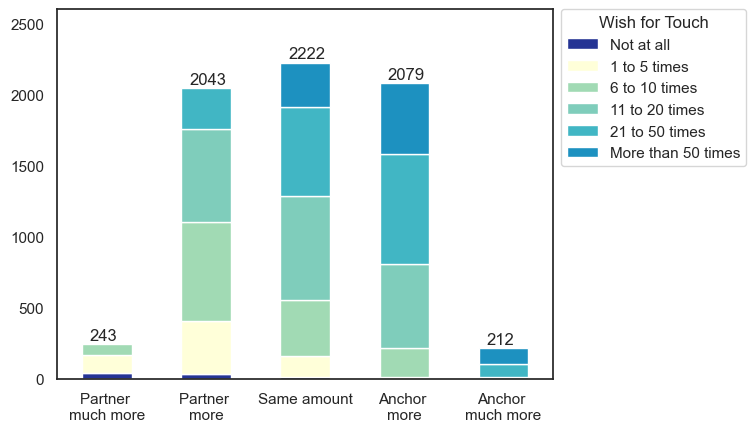

In [24]:
sns.set_theme(style='white')
ct = pd.crosstab(df2['Wish Discrepancy'], df2['Anchor Wish for Touch'])
ct.rename(desired_order, axis='columns', inplace=True)

ax = ct.plot(kind='bar', stacked=True, rot=0, color=reversed_colors)
ax.legend(title='Wish for Touch', bbox_to_anchor=(1, 1.02), loc='upper left')
#
a = df2.value_counts("Wish Discrepancy").sort_index()

for i, label in enumerate(list(a)):
    ax.annotate(str(label), (i - 0.17, label + 30))

labels = ["Partner \nmuch more",
          "Partner \nmore",
          "Same amount",
          "Anchor \nmore",
          "Anchor \nmuch more"
          ]

plt.xticks(range(5), labels=labels)
plt.xlabel("")
plt.ylim([0, 2600])
plt.grid(False)

# plt.savefig('output/img_bg/comparisons/anchor_wish_for_touch.png', dpi=350, transparent=False, bbox_inches='tight')
plt.show()

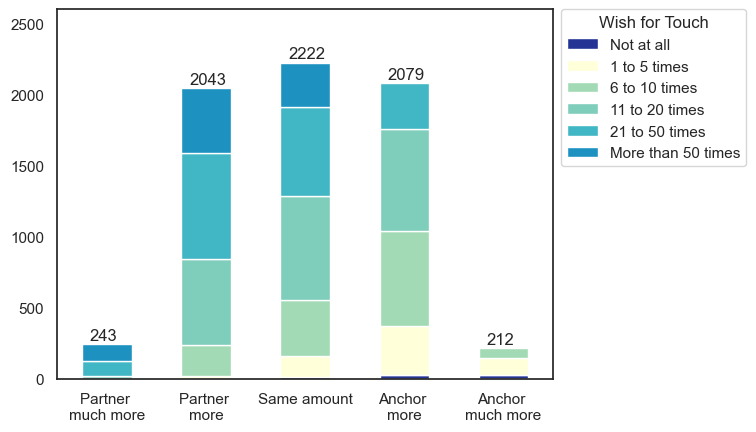

In [25]:
sns.set_theme(style='white')
ct = pd.crosstab(df2['Wish Discrepancy'], df2['Partner Wish for Touch'])
ct.rename(desired_order, axis='columns', inplace=True)

ax = ct.plot(kind='bar', stacked=True, rot=0, color=reversed_colors)
ax.legend(title='Wish for Touch', bbox_to_anchor=(1, 1.02), loc='upper left')

a = df2.value_counts("Wish Discrepancy").sort_index()

for i, label in enumerate(list(a)):
    ax.annotate(str(label), (i - 0.17, label + 30))

labels = ["Partner \nmuch more",
          "Partner \nmore",
          "Same amount",
          "Anchor \nmore",
          "Anchor \nmuch more"
          ]

plt.xticks(range(5), labels=labels)
plt.xlabel("")
plt.ylim([0, 2600])
plt.grid(False)

# plt.savefig('output/img_bg/comparisons/partner_wish_for_touch.png', dpi=350, transparent=False, bbox_inches='tight')
plt.show()

CORRELATION MAPS

In [26]:
ct = pd.crosstab(df2['Anchor Perception of Touch'], df2['Partner Perception of Touch'])
ct

Partner Perception of Touch,Deprived,Just Enough,Saturated
Anchor Perception of Touch,,,
Deprived,886,1080,55
Just Enough,1379,3017,147
Saturated,81,127,27


In [27]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
temp1 = 'Anchor Perception of Touch'
temp2 = 'Partner Perception of Touch'

kde_configs = [
    {
        "source": temp1,
        "x": "Anchor Frequency of Touch",
        "palette": sns.cubehelix_palette(10, rot=-.25, light=.7),
        "outfile": "output/img_bg/kde/anchor_perception_freq.png",
    },
    {
        "source": temp1,
        "x": "Anchor Wish for Touch",
        "palette": sns.cubehelix_palette(10, start=0.0, rot=0.3, light=0.85, dark=0.1, gamma=1.0),
        "outfile": "output/img_bg/kde/anchor_perception_wish.png",
    },
    {
        "source": temp2,
        "x": "Partner Frequency of Touch",
        "palette": sns.cubehelix_palette(10, rot=-.25, light=.7),
        "outfile": "output/img_bg/kde/partner_perception_freq.png",
    },
    {
        "source": temp2,
        "x": "Partner Wish for Touch",
        "palette": sns.cubehelix_palette(10, start=0.0, rot=0.3, light=0.85, dark=0.1, gamma=1.0),
        "outfile": "output/img_bg/kde/partner_perception_wish.png",
    },
]

for config in kde_configs:
    source = config["source"]
    x_var = config["x"]
    palette = config["palette"]
    outfile = config["outfile"]

    g = sns.FacetGrid(
        data=df2,
        row=source,
        hue=source,
        aspect=4,
        height=2,
        palette=palette
    )

    g.map(sns.kdeplot,
          x_var,
          bw_adjust=0.5,
          clip_on=False,
          fill=True,
          alpha=1,
          linewidth=1.5)

    g.map(sns.kdeplot,
          x_var,
          color="k",
          clip_on=False,
          lw=2,
          bw_adjust=0.5)

    g.refline(y=0, linewidth=2, linestyle="-", color="k", clip_on=False)


    def label(x, color, label):
        ax = plt.gca()
        ax.text(1, .1, label, fontweight="bold", color="b",
                ha="left", va="center", transform=ax.transAxes)


    g.map(label, temp1)
    g.figure.subplots_adjust(hspace=-.5)

    g.set_titles("")
    g.set_xlabels("")
    g.set(yticks=[], ylabel="")
    g.despine(bottom=True, left=True)

    plt.xticks(
        ticks=[0, 1, 2, 3, 4, 5],
        labels=[
            "Not at all",
            '1 to 5 times',
            '6 to 10 times',
            '11 to 20 times',
            '21 to 50 times',
            'More than 50 times',
        ],
        rotation=15
    )

    plt.title("")

    plt.savefig(outfile, dpi=350, transparent=False, bbox_inches='tight')
    plt.close()

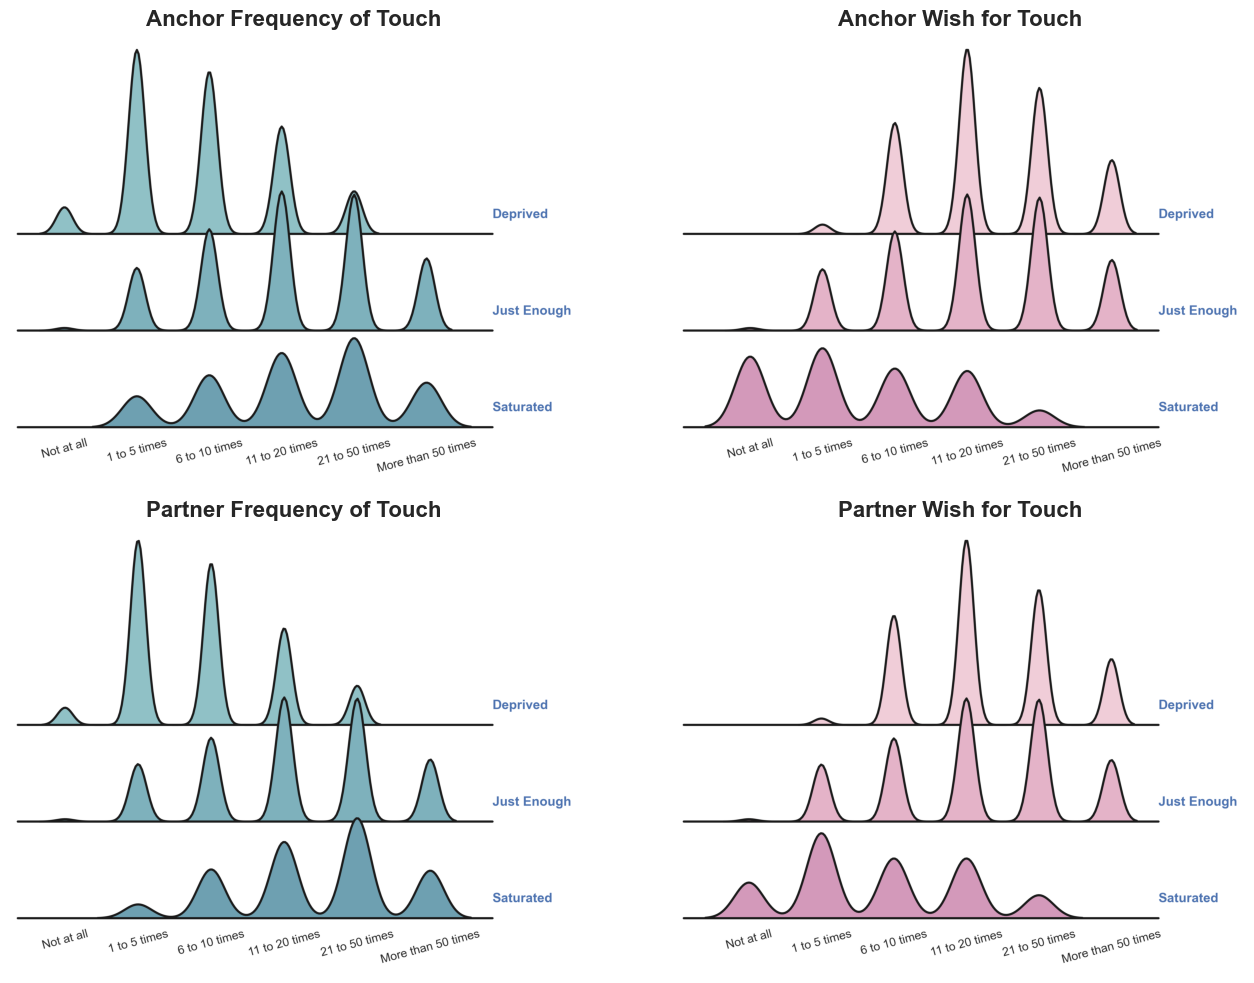

In [28]:
# Load and combine using matplotlib (or use external tools like Illustrator)

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes[0][0].imshow(plt.imread("output/img_bg/kde/anchor_perception_freq.png"))
axes[0][0].axis("off")
axes[0][0].set_title("Anchor Frequency of Touch", fontsize=16, fontweight="bold")
axes[0][1].imshow(plt.imread("output/img_bg/kde/anchor_perception_wish.png"))
axes[0][1].axis("off")
axes[0][1].set_title("Anchor Wish for Touch", fontsize=16, fontweight="bold")
axes[1][0].imshow(plt.imread("output/img_bg/kde/partner_perception_freq.png"))
axes[1][0].axis("off")
axes[1][0].set_title("Partner Frequency of Touch", fontsize=16, fontweight="bold")
axes[1][1].imshow(plt.imread("output/img_bg/kde/partner_perception_wish.png"))
axes[1][1].axis("off")
axes[1][1].set_title("Partner Wish for Touch", fontsize=16, fontweight="bold")
plt.tight_layout()
# plt.subplots_adjust(wspace=-0.2, hspace=0.1)
plt.show()

In [29]:
touch_factors = [
    'Anchor Frequency of Touch',
    'Anchor Wish for Touch',
    'Partner Frequency of Touch',
    'Partner Wish for Touch',
]

relationship_touch_factors = [
    'Anchor Deprivation of Touch',
    'Anchor Saturation of Touch',
    'Partner Deprivation of Touch',
    'Partner Saturation of Touch'
]

individual_factors = [
    'Anchor Age',
    'Partner Age',
    'Anchor Work Status',
    'Partner Work Status',
    'Anchor East',
    'Partner East',
    'Anchor Urbanization',
    'Partner Urbanization'
]

personality_factors = [
    'Anchor Extraversion',
    'Anchor Agreeableness',
    'Anchor Conscientiousness',
    'Anchor Openess',
    'Anchor Neuroticism',
    'Anchor Conservatism',
    'Anchor Religiosity',

    'Partner Extraversion',
    'Partner Agreeableness',
    'Partner Conscientiousness',
    'Partner Openess',
    'Partner Neuroticism',
    'Partner Conservatism',
    'Partner Religiosity',
]

wellbeing_factors = [
    'Anchor Depressiveness',
    'Anchor Loneliness',
    'Anchor Self-esteem',
    'Anchor Life Satisfaction',
    'Anchor Health',

    'Partner Depressiveness',
    'Partner Loneliness',
    'Partner Self-esteem',
    'Partner Life Satisfaction',
    'Partner Health',
]

relationship_factors = [
    'Relationship Sex',
    'Relationship Length',
    'Age difference',
    'Married',
    'Cohabitation',
    'Kids',
    'Anchor Communication Quality',
    'Anchor Relationship Satisfaction',
    'Anchor Conflict Management',
    'Partner Communication Quality',
    'Partner Relationship Satisfaction',
    'Partner Conflict Management',

]

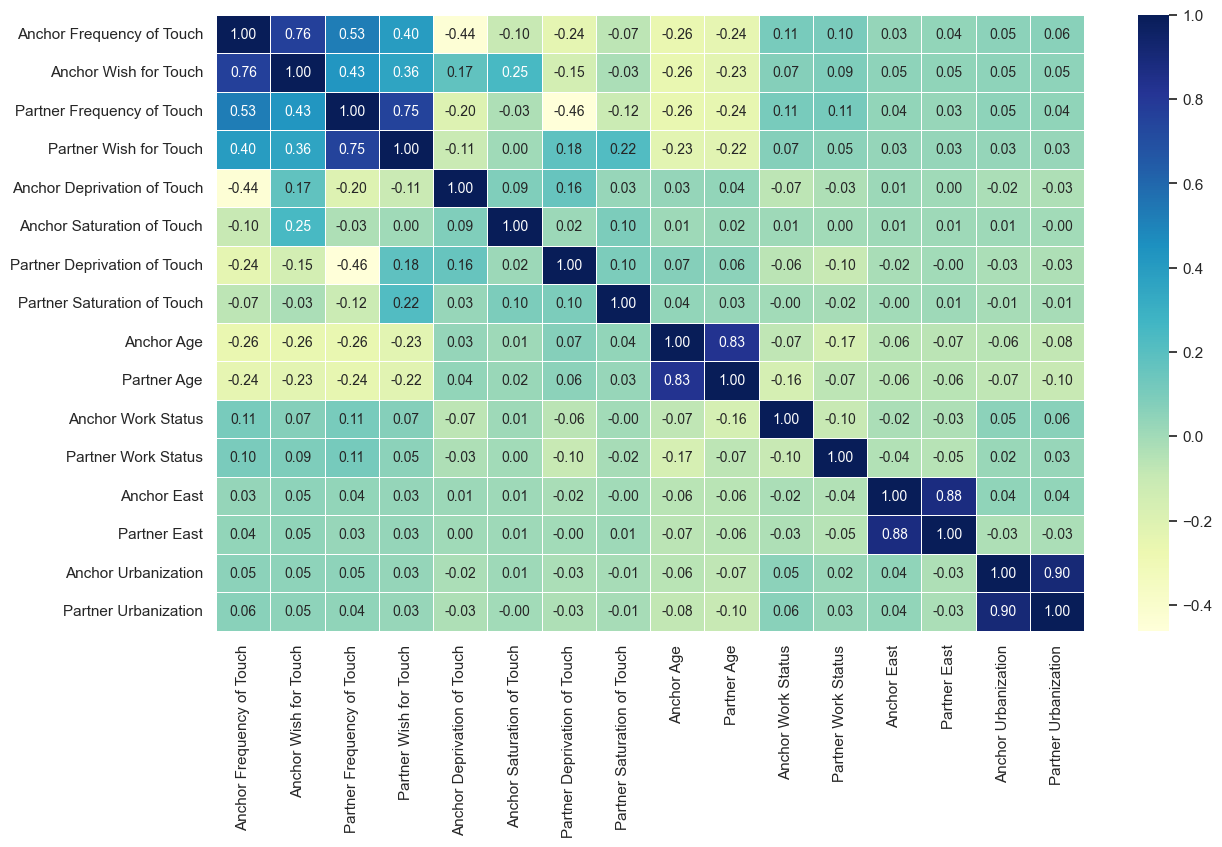

In [30]:
plt.figure(figsize=(14, 8))
plt.tight_layout()

correlation = df2[
    touch_factors + relationship_touch_factors + individual_factors
    ].corr()

sns.heatmap(correlation, cmap='YlGnBu',
            fmt='.2f',
            linewidths=0.5,
            # vmax=0.5,
            # vmin=-0.5,
            annot_kws={"size": 10},
            annot=True,
            )

plt.grid(False)
# plt.title('Moderators of touch behavior, wanting and deprivation')
plt.savefig('output/img_bg/correlation/individual_factors.png', dpi=350, transparent=False, bbox_inches='tight')

In [31]:
# pvalues = df2[individual_factors].corr(method=lambda x, y: stats.pearsonr(x, y)[1]) - np.eye(
#     len(df2[individual_factors].columns))
# plt.figure(figsize=(14, 8))
# plt.tight_layout()
# sns.heatmap(pvalues, annot=True, cmap='YlGnBu', fmt='.3f', linewidths=0.5, vmax=1, vmin=-1, annot_kws={"size": 10})
# plt.show()

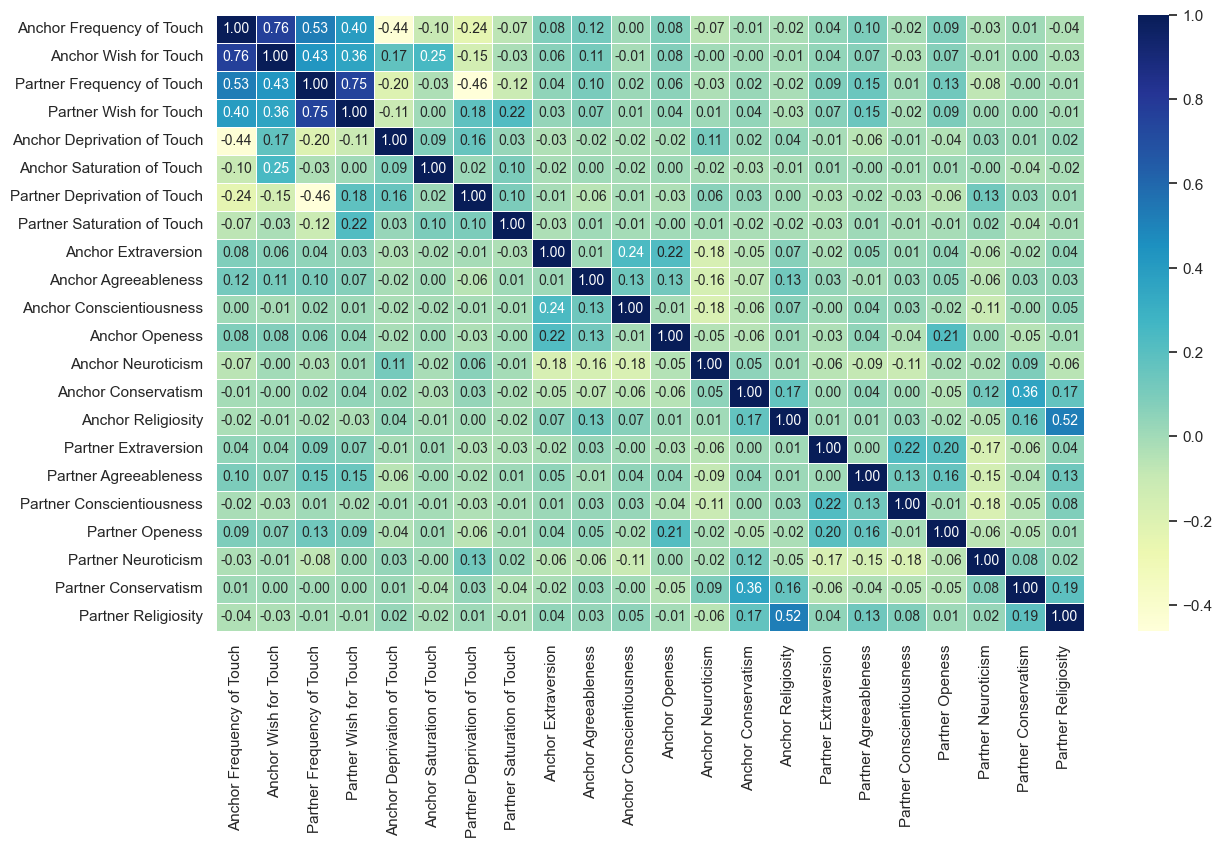

In [32]:
plt.figure(figsize=(14, 8))
plt.tight_layout()

correlation = df2[
    touch_factors + relationship_touch_factors + personality_factors
    ].corr()

sns.heatmap(correlation, cmap='YlGnBu',
            fmt='.2f',
            linewidths=0.5,
            # vmax=0.5,
            # vmin=-0.5,
            annot_kws={"size": 10},
            annot=True,
            )

plt.grid(False)
# plt.title('Moderators of touch behavior, wanting and deprivation')
plt.savefig('output/img_bg/correlation/personality_factors.png', dpi=350, transparent=False, bbox_inches='tight')

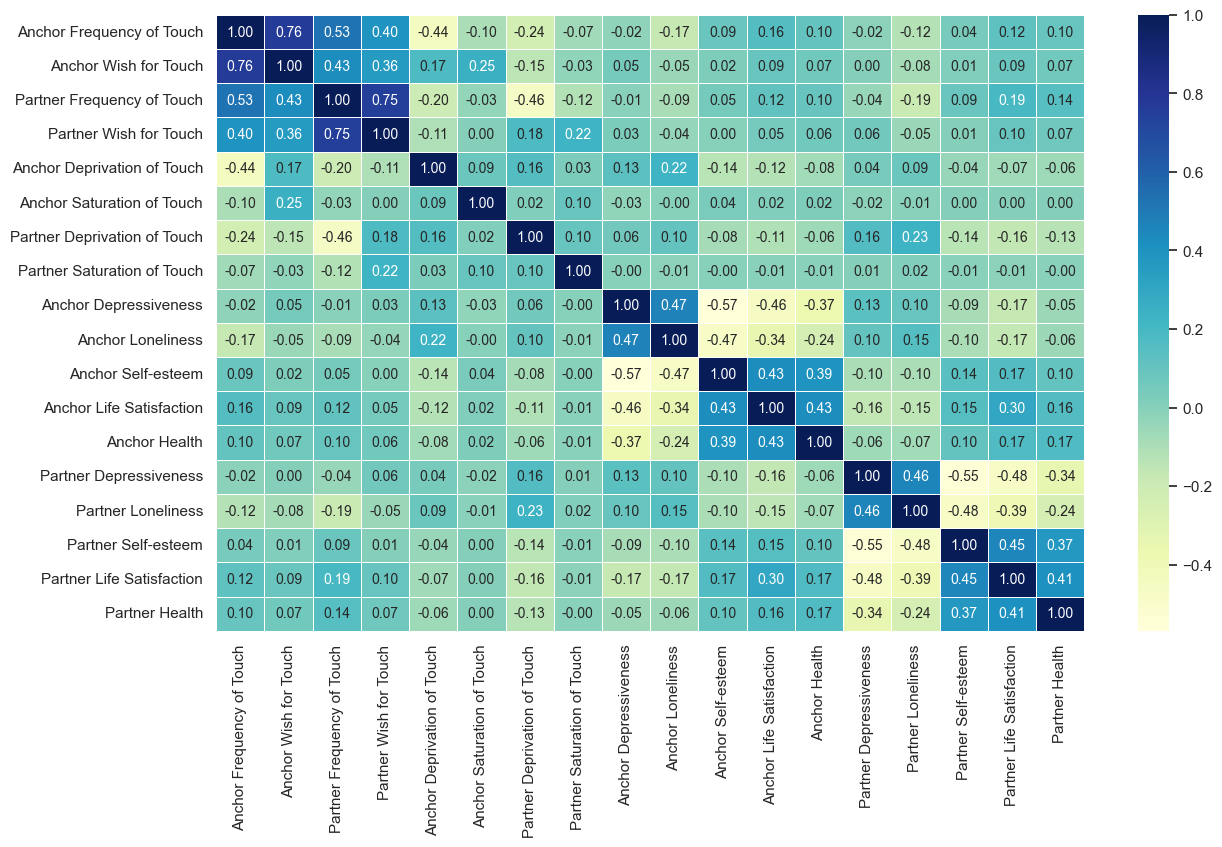

In [33]:
plt.figure(figsize=(14, 8))
plt.tight_layout()

correlation = df2[
    touch_factors + relationship_touch_factors + wellbeing_factors
    ].corr()

sns.heatmap(correlation, cmap='YlGnBu',
            fmt='.2f',
            linewidths=0.5,
            # vmax=0.5,
            # vmin=-0.5,
            annot_kws={"size": 10},
            annot=True,
            )

plt.grid(False)
# plt.title('Moderators of touch behavior, wanting and deprivation')
plt.savefig('output/img_bg/correlation/wellbeing_factors.png', dpi=350, transparent=False, bbox_inches='tight')

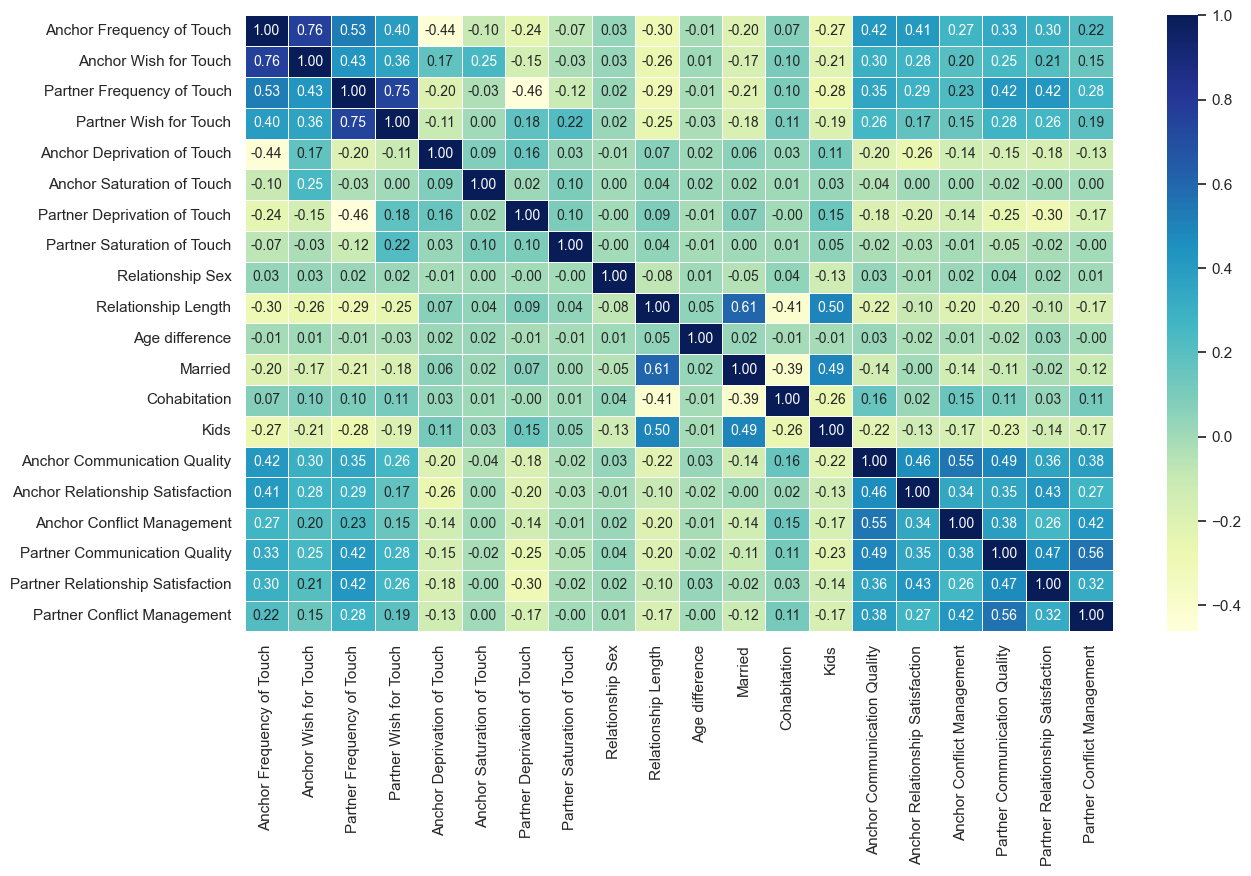

In [34]:
plt.figure(figsize=(14, 8))
plt.tight_layout()

correlation = df2[
    touch_factors + relationship_touch_factors + relationship_factors
    ].corr()

sns.heatmap(correlation, cmap='YlGnBu',
            fmt='.2f',
            linewidths=0.5,
            # vmax=0.5,
            # vmin=-0.5,
            annot_kws={"size": 10},
            annot=True,
            )

plt.grid(False)
# plt.title('Moderators of touch behavior, wanting and deprivation')
plt.savefig('output/img_bg/correlation/relationship_factors.png', dpi=350, transparent=False, bbox_inches='tight')

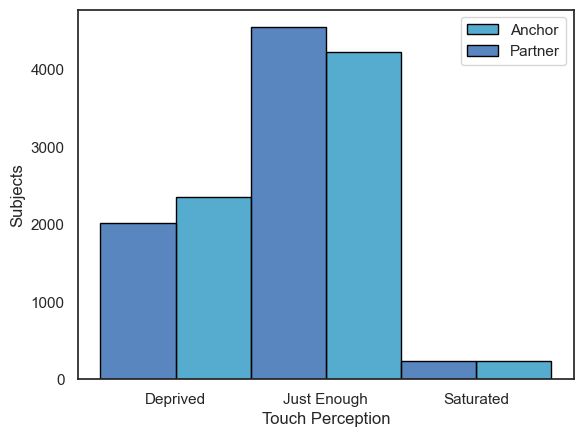

In [35]:
sns.set_theme(style='white')
df_melted = df2.melt(value_vars=['Anchor Perception of Touch', 'Partner Perception of Touch'],
                     var_name='Source', value_name='Value')

sns.histplot(data=df_melted, x='Value', hue='Source',
             element='bars',
             binwidth=0.5,
             palette=['#225ea8', '#1d91c0'],
             common_norm=False,
             multiple="dodge",
             linewidth=1,
             edgecolor='black',
             )
plt.grid(False)
plt.legend(loc='upper right', labels=["Anchor", "Partner"])
plt.xlabel("Touch Perception")
plt.ylabel("Subjects")
plt.savefig('output/img_bg/perception_histogram.png', dpi=350, transparent=False, bbox_inches='tight')

In [36]:
def calculate_freq(input_var):
    n = df2[input_var].count()
    m = [
        np.sum(df2[input_var] < 1),
        np.sum((df2[input_var] >= 1) & (df2[input_var] < 2)),
        np.sum((df2[input_var] >= 2) & (df2[input_var] < 3)),
        np.sum((df2[input_var] >= 3) & (df2[input_var] < 4)),
        np.sum((df2[input_var] >= 4) & (df2[input_var] < 5)),
        np.sum(df2[input_var] >= 5)
    ]

    temp_df = pd.DataFrame({
        input_var: [round((m[0] * 100) / n, 2),
                    round((m[1] * 100) / n, 2),
                    round((m[2] * 100) / n, 2),
                    round((m[3] * 100) / n, 2),
                    round((m[4] * 100) / n, 2),
                    round((m[5] * 100) / n, 2)]
    },
        index=["Not at all",
               "1 to 5",
               "6 to 10",
               "11 to 20",
               "21 to 50",
               "> 50"])

    return temp_df


var_names = ['Anchor Frequency of Touch',
             'Anchor Wish for Touch',
             'Partner Frequency of Touch',
             'Partner Wish for Touch',
             'Anchor Kiss Frequency',
             'Anchor Kiss Wish',
             'Partner Kiss Frequency',
             'Partner Kiss Wish',
             'Anchor Hold Frequency',
             'Anchor Hold Wish',
             'Partner Hold Frequency',
             'Partner Hold Wish',
             'Anchor Hug Frequency',
             'Anchor Hug Wish',
             'Partner Hug Frequency',
             'Partner Hug Wish',
             ]

labels = ["Not at all",
          "1 to 5",
          "6 to 10",
          "11 to 20",
          "21 to 50",
          "> 50", ]
frequency_map = pd.DataFrame({}, index=labels)

for i, label in enumerate(var_names):
    a = calculate_freq(label)
    frequency_map = pd.concat([frequency_map, a], axis=1)

In [37]:
labels = ["Not at all",
          "1 to 5",
          "6 to 10",
          "11 to 20",
          "21 to 50",
          "> 50", ]

cols = frequency_map.columns.tolist()

lines_w = 3

for i, name in enumerate(cols):
    ax = sns.barplot(frequency_map[cols[i]],
                     linewidth=lines_w,
                     edgecolor='k',
                     facecolor=(0, 0, 0, 0)
                     )
    multiplier = 0
    for attribute, measurement in frequency_map[cols[i]].items():
        offset = multiplier
        rects = ax.bar(offset,
                       measurement,
                       label=attribute,
                       edgecolor='k',
                       facecolor=(0, 0, 0, 0)
                       )
        ax.bar_label(rects)
        multiplier += 1
    if i % 2 == 1:
        for bar in ax.patches:
            bar.set_linestyle('--')
            bar.set_linewidth(lines_w)
    elif i % 2 == 0:
        for bar in ax.patches:
            bar.set_linestyle('-')
            bar.set_linewidth(lines_w)

    plt.ylim(0, 35)
    # plt.show()
    plt.close()
    # # plt.savefig('output/img_bg/frequency/' + name + '.png', dpi=350, transparent=False, bbox_inches='tight')

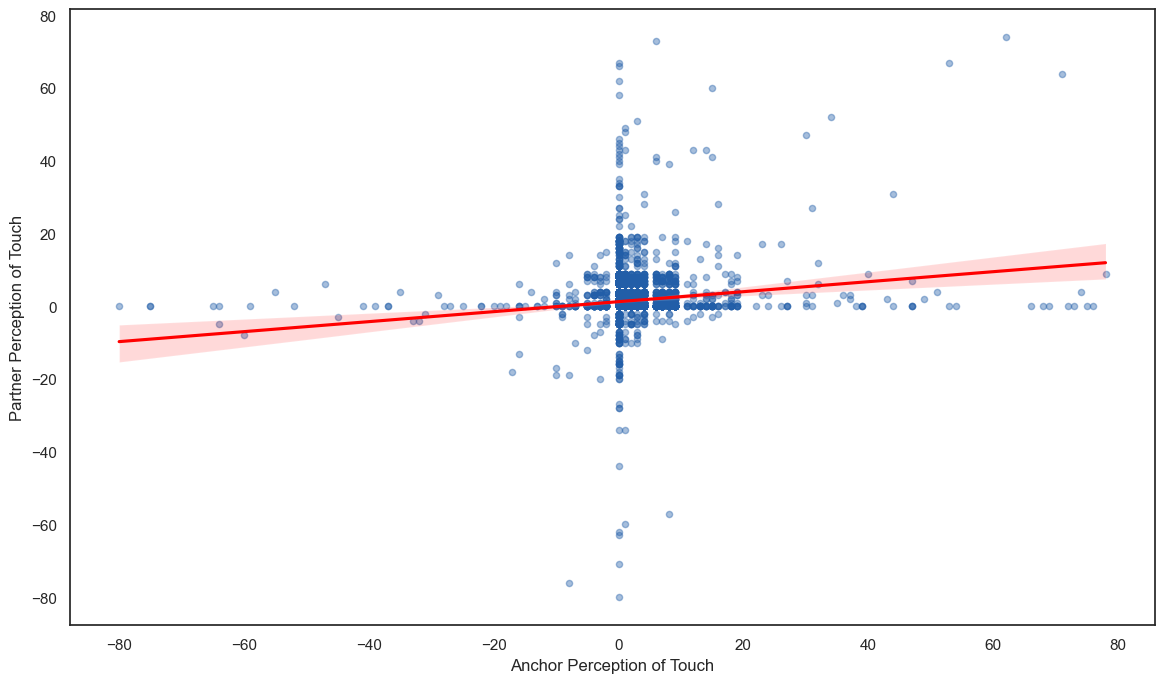

In [38]:
def map_to_random_value(response):
    if response == 0:
        return 0
    elif response == 1:
        return np.random.randint(1, 5)
    elif response == 2:
        return np.random.randint(6, 10)
    elif response == 3:
        return np.random.randint(11, 20)
    elif response == 4:
        return np.random.randint(21, 50)
    elif response == 5:
        return np.random.randint(51, 80)
    elif response == -1:
        return np.random.randint(-5, -1)
    elif response == -2:
        return np.random.randint(-10, -6)
    elif response == -3:
        return np.random.randint(-20, -11)
    elif response == -4:
        return np.random.randint(-50, -21)
    elif response == -5:
        return np.random.randint(-80, -51)
    else:
        return np.nan


df2["x_value"] = df2["Anchor Difference of Touch"].apply(map_to_random_value)
df2["y_value"] = df2["Partner Difference of Touch"].apply(map_to_random_value)

plt.figure(figsize=(14, 8))
plt.tight_layout()
sns.regplot(data=df2, x="x_value", y="y_value",
            scatter_kws={'alpha': 0.4, 's': 20, 'color': "#225ea8"},
            line_kws={'color': 'red'},
            order=1,
            # x_jitter=0.1
            )

plt.xlabel("Anchor Perception of Touch")
plt.ylabel("Partner Perception of Touch")

plt.grid(False)
plt.savefig('output/img_bg/scatter/scatter_anchor_partner.png', dpi=350, transparent=False, bbox_inches='tight')
plt.show()

In [39]:
# df_melted = df2.melt(id_vars='Anchor Age group',
#                      value_vars=['Anchor Frequency of Touch', 'Anchor Wish for Touch'],
#                      var_name='Touch index', value_name='Touch Freq'
#                      )
# pairs = [
#     ((1, "Anchor Frequency of Touch"), (5, "Anchor Frequency of Touch")),
#     ((1, "Anchor Wish for Touch"), (5, "Anchor Wish for Touch")),
# ]
#
# x = "Anchor Age group"
# y = "Touch Freq"
# hue = "Touch index"
# hue_order = ['Anchor Frequency of Touch', 'Anchor Wish for Touch']
#
# ax = sns.boxplot(data=df_melted, x=x, y=y, hue=hue, hue_order=hue_order, palette='YlGnBu', showfliers=False)
# annot = Annotator(ax, pairs, data=df_melted, x=x, y=y, hue=hue, hue_order=hue_order, )
# annot.configure(test='Mann-Whitney', verbose=2,
#                 pvalue_thresholds=[[0.001, '***'], [0.01, '**'], [0.05, '*'], [1, 'ns']])
#
# annot.apply_test()
# annot.annotate()
# plt.tight_layout()
# plt.ylabel("")
# plt.xlabel("")
#
# plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))
# plt.yticks([0, 1, 2, 3, 4, 5], labels=["0x", "1-5x", "6-10x", "11-20x", "21-50x", "> 50x"])
# plt.xticks(ticks=[0, 1, 2, 3, 4], labels=["18-20 years", "21-30 years", "31-40 years", "41-50 years", "51+ years"])
# plt.title("Touch by Age")
# # plt.savefig('output/img_bg/comparisons/Anchor-age.png', dpi=350, transparent=False, bbox_inches='tight')
# plt.show()

In [40]:
# df_melted = df2.melt(id_vars='Anchor Loneliness',
#                      value_vars=['Anchor Frequency of Touch', 'Anchor Wish for Touch'],
#                      var_name='Touch index', value_name='Touch Freq'
#                      )
# pairs = [
#     ((1, "Anchor Frequency of Touch"), (5, "Anchor Frequency of Touch")),
#     ((1, "Anchor Wish for Touch"), (5, "Anchor Wish for Touch")),
# ]
#
# x = "Anchor Loneliness"
# y = "Touch Freq"
# hue = "Touch index"
# hue_order = ['Anchor Frequency of Touch', 'Anchor Wish for Touch']
#
# ax = sns.boxplot(data=df_melted, x=x, y=y, hue=hue, hue_order=hue_order, palette='YlGnBu', showfliers=False)
#
# annot = Annotator(ax, pairs, data=df_melted, x=x, y=y, hue=hue, hue_order=hue_order, )
# annot.configure(test='Mann-Whitney', verbose=2,
#                 pvalue_thresholds=[[0.001, '***'], [0.01, '**'], [0.05, '*'], [1, 'ns']])
#
# annot.apply_test()
# annot.annotate()
#
# plt.tight_layout()
# plt.ylabel("")
# plt.xlabel("")
#
# plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))
# plt.xlim(reversed(plt.xlim()))
# plt.yticks([0, 1, 2, 3, 4, 5], labels=["0x", "1-5x", "6-10x", "11-20x", "21-50x", "> 50x"])
# plt.xticks(ticks=[0, 1, 2, 3, 4], labels=["Not at all lonely", "2", "3", "4", "Absolutely lonely"])
# plt.title("Touch by Loneliness")
# # plt.savefig('output/img_bg/comparisons/Anchor-loneliness.png', dpi=350, transparent=False, bbox_inches='tight')
# plt.show()

In [41]:
# pd.crosstab(df2["Anchor Frequency of Touch"], columns=['Anchor Loneliness'])

In [42]:
# pd.crosstab(df2["Anchor Wish for Touch"], columns=['Anchor Loneliness'])

In [43]:
# df_melted = df2.melt(id_vars='Relationship Length',
#                      value_vars=['Anchor Frequency of Touch', 'Anchor Wish for Touch',
#                                  'Partner Frequency of Touch',
#                                  'Partner Wish for Touch'],
#                      var_name='Touch index', value_name='Touch Freq'
#                      )
#
# x = "Relationship Length"
# y = "Touch Freq"
# hue = "Touch index"
# hue_order = ['Anchor Frequency of Touch', 'Anchor Wish for Touch']
# pairs = [
#     ((1, "Anchor Frequency of Touch"), (5, "Anchor Frequency of Touch")),
#     ((1, "Anchor Wish for Touch"), (5, "Anchor Wish for Touch")),
# ]
# ax = sns.boxplot(data=df_melted, x=x, y=y, hue=hue, hue_order=hue_order, palette='YlGnBu', showfliers=False)
# annot = Annotator(ax, pairs, data=df_melted, x=x, y=y, hue=hue, hue_order=hue_order, )
# annot.configure(test='Mann-Whitney', verbose=2,
#                 pvalue_thresholds=[[0.001, '***'], [0.01, '**'], [0.05, '*'], [1, 'ns']])
#
# annot.apply_test()
# annot.annotate()
# plt.tight_layout()
# plt.ylabel("")
# plt.xlabel("")
# plt.xlim(reversed(plt.xlim()))
# plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))
# plt.xticks(ticks=[0, 1, 2, 3, 4], labels=["0-2 years", "3-5 years", "6-10 years", "11-20 years", "21+ years"])
# plt.yticks([0, 1, 2, 3, 4, 5], labels=["0x", "1-5x", "6-10x", "11-20x", "21-50x", "> 50x"])
# plt.title("Touch by Relationship Length")
# # plt.savefig("output/img_bg/comparisons/Anchor-relationlength.png", dpi=350, transparent=False, bbox_inches='tight')
# plt.show()

In [44]:
# for i in range(0, len(df2)):
#     if 7 < df2['Anchor Communication Quality'][i] <= 12:
#         df2.loc[i, 'Anchor comm'] = 1
#     elif 12 < df2['Anchor Communication Quality'][i] <= 17:
#         df2.loc[i, 'Anchor comm'] = 2
#     elif 17 < df2['Anchor Communication Quality'][i] <= 22:
#         df2.loc[i, 'Anchor comm'] = 3
#     elif 22 < df2['Anchor Communication Quality'][i] <= 27:
#         df2.loc[i, 'Anchor comm'] = 4
#     elif 27 < df2['Anchor Communication Quality'][i]:
#         df2.loc[i, 'Anchor comm'] = 5
#
# df_melted = df2.melt(id_vars='Anchor comm',
#                      value_vars=['Anchor Frequency of Touch', 'Anchor Wish for Touch'],
#                      var_name='Touch index', value_name='Touch Freq'
#                      )
#
# x = "Anchor comm"
# y = "Touch Freq"
# hue = "Touch index"
# hue_order = ['Anchor Frequency of Touch', 'Anchor Wish for Touch']
# pairs = [
#     ((1, "Anchor Frequency of Touch"), (5, "Anchor Frequency of Touch")),
#     ((1, "Anchor Wish for Touch"), (5, "Anchor Wish for Touch")),
# ]
# ax = sns.boxplot(data=df_melted, x=x, y=y, hue=hue, hue_order=hue_order, palette='YlGnBu', showfliers=False)
#
# annot = Annotator(ax, pairs, data=df_melted, x=x, y=y, hue=hue, hue_order=hue_order, )
# annot.configure(test='Mann-Whitney', verbose=2,
#                 pvalue_thresholds=[[0.001, '***'], [0.01, '**'], [0.05, '*'], [1, 'ns']])
#
# annot.apply_test()
# annot.annotate()
# plt.tight_layout()
# plt.ylabel("")
# plt.xlabel("")
#
# plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))
# plt.yticks([0, 1, 2, 3, 4, 5], labels=["0x", "1-5x", "6-10x", "11-20x", "21-50x", "> 50x"])
# plt.xticks(ticks=[0, 1, 2, 3, 4],
#            labels=["Less positive \n communication", "", "", "", "More positive \n communication"])
# plt.title("Touch by Communication Quality")
# # plt.savefig("output/img_bg/comparisons/Anchor-communication.png", dpi=350, transparent=False, bbox_inches='tight')
# plt.show()

In [45]:
# df_melted = df2.melt(id_vars='Kids',
#                      value_vars=['Anchor Frequency of Touch', 'Anchor Wish for Touch'],
#                      var_name='Touch index', value_name='Touch Freq'
#                      )
#
# x = "Kids"
# y = "Touch Freq"
# hue = "Touch index"
# hue_order = ['Anchor Frequency of Touch', 'Anchor Wish for Touch']
# pairs = [
#     ((0, "Anchor Frequency of Touch"), (3, "Anchor Frequency of Touch")),
#     ((0, "Anchor Wish for Touch"), (3, "Anchor Wish for Touch")),
# ]
# ax = sns.boxplot(data=df_melted, x=x, y=y, hue=hue, hue_order=hue_order, palette='YlGnBu', showfliers=False)
# annot = Annotator(ax, pairs, data=df_melted, x=x, y=y, hue=hue, hue_order=hue_order, )
# annot.configure(test='Mann-Whitney', verbose=2,
#                 pvalue_thresholds=[[0.001, '***'], [0.01, '**'], [0.05, '*'], [1, 'ns']])
#
# annot.apply_test()
# annot.annotate()
# plt.tight_layout()
# plt.ylabel("")
# plt.xlabel("")
# plt.xlim(reversed(plt.xlim()))
# plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))
# plt.yticks([0, 1, 2, 3, 4, 5], labels=["0x", "1-5x", "6-10x", "11-20x", "21-50x", "> 50x"])
# plt.xticks(ticks=[0, 1, 2, 3], labels=["0 Kids", "1", "2", "3 or more"])
# plt.title("Touch by Kids in the household")
# # plt.savefig("output/img_bg/comparisons/Anchor-kids.png", dpi=350, transparent=False, bbox_inches='tight')
# plt.show()

In [46]:
# df_melted = df2.melt(id_vars='Anchor Relationship Satisfaction',
#                      value_vars=['Anchor Frequency of Touch', 'Anchor Wish for Touch'],
#                      var_name='Touch index', value_name='Touch Freq'
#                      )
#
# x = "Anchor Relationship Satisfaction"
# y = "Touch Freq"
# hue = "Touch index"
# hue_order = ['Anchor Frequency of Touch', 'Anchor Wish for Touch']
# pairs = [
#     ((0, "Anchor Frequency of Touch"), (10, "Anchor Frequency of Touch")),
#     ((0, "Anchor Wish for Touch"), (10, "Anchor Wish for Touch")),
# ]
# ax = sns.boxplot(data=df_melted, x=x, y=y, hue=hue, hue_order=hue_order, palette='YlGnBu', showfliers=False)
# annot = Annotator(ax, pairs, data=df_melted, x=x, y=y, hue=hue, hue_order=hue_order, )
# annot.configure(test='Mann-Whitney', verbose=2,
#                 pvalue_thresholds=[[0.001, '***'], [0.01, '**'], [0.05, '*'], [1, 'ns']])
#
# annot.apply_test()
# annot.annotate()
# plt.tight_layout()
# plt.ylabel("")
# plt.xlabel("")
# plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))
# plt.yticks([0, 1, 2, 3, 4, 5], labels=["0x", "1-5x", "6-10x", "11-20x", "21-50x", "> 50x"])
# plt.xticks(ticks=[0, 1, 2, 3, 4, 5], labels=["Not at all satisfied", "2", "4", "6", "8", "Completely satisfied"])
# plt.title("Touch by Relationship Satisfaction")
# # plt.savefig("output/img_bg/comparisons/Anchor-relationsat.png", dpi=350, transparent=False, bbox_inches='tight')
# plt.show()

KDE

In [47]:
# plt.figure(figsize=(14, 8))
# duration_options = {
#     1: '18-20 years',
#     2: '21-30 years',
#     3: '31-40 years',
#     4: '41-50 years',
#     5: '51+ years'
# }
#
# df2['text Relationship'] = df2['Anchor Age group'].map(duration_options)
#
# a = 'text Relationship'
#
# kdf = df2.sort_values(
#     by="Anchor Age group",
#     ascending=False
# )
#
# sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
#
# pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
# g = sns.FacetGrid(data=kdf,
#                   row=a,
#                   hue=a,
#                   aspect=8,
#                   height=1,
#                   palette=pal
#                   )
# g.map(sns.kdeplot,
#       "Discrepancy",
#       bw_adjust=.5,
#       clip_on=False,
#       fill=True,
#       alpha=1,
#       linewidth=1.5)
#
# g.map(sns.kdeplot, "Discrepancy", color="w", clip_on=False, lw=2, bw_adjust=.5)
# g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)
#
#
# def label(x, color, label):
#     ax = plt.gca()
#     ax.text(1, .1, label, fontweight="bold", color="b",
#             ha="left", va="center", transform=ax.transAxes)
#
#
# g.map(label, a)
# g.figure.subplots_adjust(hspace=-.5)
#
# g.set_titles("")
# g.set_xlabels("")
# g.set()
# g.set(yticks=[], ylabel="")
# g.despine(bottom=True, left=True)
# plt.xticks(ticks=[-2, -1, 0, 1, 2],
#            # labels=["My Partner $\mathbf{wants}$ \n$\mathbf{a}$ $\mathbf{lot}$ $\mathbf{more}$\n touch than I",
#            #                               "My Partner \n$\mathbf{wants}$ $\mathbf{more}$ \ntouch than I",
#            #                               "I $\mathbf{want}$ $\mathbf{the}$\n $\mathbf{same}$ amount of \ntouch as my partner",
#            #                               "I $\mathbf{want}$ $\mathbf{more}$ \ntouch than \nmy partner",
#            #                               "I $\mathbf{want}$ $\mathbf{a}$ $\mathbf{lot}$ \n $\mathbf{more}$ touch \nthan my partner"
#            #                               ],
#            #  labels=["My Partner\n wants a lot \nmore touch \nthan I",
#            #         "My Partner\n wants more \ntouch \nthan I",
#            #         "I want the\n same amount \nof touch \nas my partner",
#            #         "I want \nmore touch \nthan \nmy partner",
#            #         "I want a \nlot more \ntouch than \nmy partner"
#            #         ],
#            )
# # plt.savefig("output/img_bg/KDE_linear_age.png", dpi=350, transparent=False, bbox_inches='tight')
# # plt.title("Difference by Age")
# plt.show()

In [48]:
# plt.figure(figsize=(14, 8))
# duration_options = {
#     1: 'Not at all\n lonely',
#     2: '2',
#     3: '3',
#     4: '4',
#     5: 'Absolutely\n lonely'
# }
#
# df2['text Relationship'] = df2['Anchor Loneliness'].map(duration_options)
#
# a = 'text Relationship'
#
# kdf = df2.sort_values(
#     by="Anchor Loneliness",
#     ascending=True
# )
#
# sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
#
# pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
# g = sns.FacetGrid(data=kdf,
#                   row=a,
#                   hue=a,
#                   aspect=8,
#                   height=1,
#                   palette=pal
#                   )
# g.map(sns.kdeplot,
#       "Discrepancy",
#       bw_adjust=.5,
#       clip_on=False,
#       fill=True,
#       alpha=1,
#       linewidth=1.5)
#
# g.map(sns.kdeplot, "Discrepancy", color="w", clip_on=False, lw=2, bw_adjust=.5)
# g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)
#
#
# def label(x, color, label):
#     ax = plt.gca()
#     ax.text(1, .1, label, fontweight="bold", color="b",
#             ha="left", va="center", transform=ax.transAxes)
#
#
# g.map(label, a)
# g.figure.subplots_adjust(hspace=-.5)
#
# g.set_titles("")
# g.set_xlabels("")
# g.set()
# g.set(yticks=[], ylabel="")
# g.despine(bottom=True, left=True)
# plt.xticks(ticks=[-2, -1, 0, 1, 2]
#            # labels=["My Partner $\mathbf{wants}$ \n$\mathbf{a}$ $\mathbf{lot}$ $\mathbf{more}$\n touch than I",
#            #                               "My Partner \n$\mathbf{wants}$ $\mathbf{more}$ \ntouch than I",
#            #                               "I $\mathbf{want}$ $\mathbf{the}$\n $\mathbf{same}$ amount of \ntouch as my partner",
#            #                               "I $\mathbf{want}$ $\mathbf{more}$ \ntouch than \nmy partner",
#            #                               "I $\mathbf{want}$ $\mathbf{a}$ $\mathbf{lot}$ \n $\mathbf{more}$ touch \nthan my partner"
#            #                               ],
#            # labels=["My Partner\n wants a lot \nmore touch \nthan I",
#            #         "My Partner\n wants more \ntouch \nthan I",
#            #         "I want the\n same amount \nof touch \nas my partner",
#            #         "I want \nmore touch \nthan \nmy partner",
#            #         "I want a \nlot more \ntouch than \nmy partner"
#            #         ],
#            )
# # plt.title("Discrepancy by Loneliness")
# # plt.savefig("output/img_bg/KDE_linear_loneliness.png", dpi=350, transparent=False, bbox_inches='tight')
# plt.show()

In [49]:
# plt.figure(figsize=(14, 8))
# duration_options = {
#     1: '0-2 years',
#     2: '3-5 years',
#     3: '6-10 years',
#     4: '11-20 years',
#     5: '21+ years'
# }
#
# df2['text Relationship'] = df2['Relationship Length'].map(duration_options)
#
# a = 'text Relationship'
#
# kdf = df2.sort_values(
#     by="Relationship Length",
#     ascending=True
# )
#
# sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
#
# pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
# g = sns.FacetGrid(data=kdf,
#                   row=a,
#                   hue=a,
#                   aspect=8,
#                   height=1,
#                   palette=pal
#                   )
# g.map(sns.kdeplot,
#       "Discrepancy",
#       bw_adjust=.5,
#       clip_on=False,
#       fill=True,
#       alpha=1,
#       linewidth=1.5)
#
# g.map(sns.kdeplot, "Discrepancy", color="w", clip_on=False, lw=2, bw_adjust=.5)
# g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)
#
#
# def label(x, color, label):
#     ax = plt.gca()
#     ax.text(1, .1, label, fontweight="bold", color="b",
#             ha="left", va="center", transform=ax.transAxes)
#
#
# g.map(label, a)
# g.figure.subplots_adjust(hspace=-.5)
#
# g.set_titles("")
# g.set_xlabels("")
# g.set()
# g.set(yticks=[], ylabel="")
# g.despine(bottom=True, left=True)
# plt.xticks(ticks=[-2, -1, 0, 1, 2],
#            # labels=["My Partner $\mathbf{wants}$ \n$\mathbf{a}$ $\mathbf{lot}$ $\mathbf{more}$\n touch than I",
#            #                               "My Partner \n$\mathbf{wants}$ $\mathbf{more}$ \ntouch than I",
#            #                               "I $\mathbf{want}$ $\mathbf{the}$\n $\mathbf{same}$ amount of \ntouch as my partner",
#            #                               "I $\mathbf{want}$ $\mathbf{more}$ \ntouch than \nmy partner",
#            #                               "I $\mathbf{want}$ $\mathbf{a}$ $\mathbf{lot}$ \n $\mathbf{more}$ touch \nthan my partner"
#            #                               ],
#            # labels=["My Partner wants \na lot more\n touch than I",
#            #         "My Partner \nwants more \ntouch than I",
#            #         "I want the same \namount of touch \nas my partner",
#            #         "I want more \ntouch than \nmy partner",
#            #         "I want a lot \n more touch \nthan my partner"
#            #         ],
#            )
# # plt.title("Discrepancy by Relationship Length")
# # plt.savefig("output/img_bg/KDE_linear.png", dpi=350, transparent=False, bbox_inches='tight')
# plt.show()

In [50]:
# plt.figure(figsize=(14, 8))
# duration_options = {
#     0: '0 \n Kids',
#     1: '1',
#     2: '2',
#     3: ' 3 or \n more',
# }
#
# df['text Relationship'] = df['Kids'].map(duration_options)
#
# a = 'text Relationship'
#
# kdf = df.sort_values(
#     by="Kids",
#     ascending=True
# )
#
# sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
#
# pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
# g = sns.FacetGrid(data=kdf,
#                   row=a,
#                   hue=a,
#                   aspect=8,
#                   height=1,
#                   palette=pal
#                   )
# g.map(sns.kdeplot,
#       "Discrepancy",
#       bw_adjust=.5,
#       clip_on=False,
#       fill=True,
#       alpha=1,
#       linewidth=1.5)
#
# g.map(sns.kdeplot, "Discrepancy", color="w", clip_on=False, lw=2, bw_adjust=.5)
# g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)
#
#
# def label(x, color, label):
#     ax = plt.gca()
#     ax.text(1, .1, label, fontweight="bold", color="b",
#             ha="left", va="center", transform=ax.transAxes)
#
#
# g.map(label, a)
# g.figure.subplots_adjust(hspace=-.5)
#
# g.set_titles("")
# g.set_xlabels("")
# g.set()
# g.set(yticks=[], ylabel="")
# g.despine(bottom=True, left=True)
# plt.xticks(ticks=[-2, -1, 0, 1, 2],
#            # labels=["My Partner $\mathbf{wants}$ \n$\mathbf{a}$ $\mathbf{lot}$ $\mathbf{more}$\n touch than I",
#            #                               "My Partner \n$\mathbf{wants}$ $\mathbf{more}$ \ntouch than I",
#            #                               "I $\mathbf{want}$ $\mathbf{the}$\n $\mathbf{same}$ amount of \ntouch as my partner",
#            #                               "I $\mathbf{want}$ $\mathbf{more}$ \ntouch than \nmy partner",
#            #                               "I $\mathbf{want}$ $\mathbf{a}$ $\mathbf{lot}$ \n $\mathbf{more}$ touch \nthan my partner"
#            #                               ],
#            # labels=["My Partner wants \na lot more\n touch than I",
#            #         "My Partner \nwants more \ntouch than I",
#            #         "I want the same \namount of touch \nas my partner",
#            #         "I want more \ntouch than \nmy partner",
#            #         "I want a lot \n more touch \nthan my partner"
#            #         ],
#            )
# # plt.title("Discrepancy by Kids in the household")
# # plt.savefig("output/img_bg/KDE_linear-kids.png", dpi=350, transparent=False, bbox_inches='tight')
# plt.show()

In [51]:
# plt.figure(figsize=(14, 8))
# duration_options = {
#     1: 'Less positive \n communication',
#     2: '1',
#     3: '2',
#     4: '3',
#     5: "More positive \n communication"
# }
# df['text Relationship'] = df['Anchor comm'].map(duration_options)
#
# a = 'text Relationship'
#
# kdf = df.sort_values(
#     by="Anchor comm",
#     ascending=False
# )
#
# sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
#
# pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
# g = sns.FacetGrid(data=kdf,
#                   row=a,
#                   hue=a,
#                   aspect=8,
#                   height=1,
#                   palette=pal
#                   )
# g.map(sns.kdeplot,
#       "Discrepancy",
#       bw_adjust=.5,
#       clip_on=False,
#       fill=True,
#       alpha=1,
#       linewidth=1.5)
#
# g.map(sns.kdeplot, "Discrepancy", color="w", clip_on=False, lw=2, bw_adjust=.5)
# g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)
#
#
# def label(x, color, label):
#     ax = plt.gca()
#     ax.text(1, .1, label, fontweight="bold", color="b",
#             ha="left", va="center", transform=ax.transAxes)
#
#
# g.map(label, a)
# g.figure.subplots_adjust(hspace=-.5)
#
# g.set_titles("")
# g.set_xlabels("")
# g.set()
# g.set(yticks=[], ylabel="")
# g.despine(bottom=True, left=True)
# plt.xticks(ticks=[-2, -1, 0, 1, 2],
#            # labels=["My Partner $\mathbf{wants}$ \n$\mathbf{a}$ $\mathbf{lot}$ $\mathbf{more}$\n touch than I",
#            #                               "My Partner \n$\mathbf{wants}$ $\mathbf{more}$ \ntouch than I",
#            #                               "I $\mathbf{want}$ $\mathbf{the}$\n $\mathbf{same}$ amount of \ntouch as my partner",
#            #                               "I $\mathbf{want}$ $\mathbf{more}$ \ntouch than \nmy partner",
#            #                               "I $\mathbf{want}$ $\mathbf{a}$ $\mathbf{lot}$ \n $\mathbf{more}$ touch \nthan my partner"
#            #                               ],
#            # labels=["My Partner wants \na lot more\n touch than I",
#            #         "My Partner \nwants more \ntouch than I",
#            #         "I want the same \namount of touch \nas my partner",
#            #         "I want more \ntouch than \nmy partner",
#            #         "I want a lot \n more touch \nthan my partner"
#            #         ],
#            )
#
# # plt.title("Discrepancy by Communication quality")
# # plt.savefig("output/img_bg/KDE_linear-com.png", dpi=350, transparent=False, bbox_inches='tight')
# plt.show()

In [52]:
# plt.figure(figsize=(14, 8))
# duration_options = {
#     0: 'Not at all\n satisfied',
#     2: '2',
#     4: '4',
#     6: '6',
#     8: '8',
#     10: 'Completely\n satisfied'
# }
# df['text Relationship'] = df['Anchor Relationship Satisfaction'].map(duration_options)
#
# a = 'text Relationship'
#
# kdf = df.sort_values(
#     by="Anchor Relationship Satisfaction",
#     ascending=False
# )
#
# sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
#
# pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
# g = sns.FacetGrid(data=kdf,
#                   row=a,
#                   hue=a,
#                   aspect=8,
#                   height=1,
#                   palette=pal
#                   )
# g.map(sns.kdeplot,
#       "Discrepancy",
#       bw_adjust=.5,
#       clip_on=False,
#       fill=True,
#       alpha=1,
#       linewidth=1.5)
#
# g.map(sns.kdeplot, "Discrepancy", color="w", clip_on=False, lw=2, bw_adjust=.5)
# g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)
#
#
# def label(x, color, label):
#     ax = plt.gca()
#     ax.text(1, .1, label, fontweight="bold", color="b",
#             ha="left", va="center", transform=ax.transAxes)
#
#
# g.map(label, a)
# g.figure.subplots_adjust(hspace=-.5)
#
# g.set_titles("")
# g.set_xlabels("")
# g.set()
# g.set(yticks=[], ylabel="")
# g.despine(bottom=True, left=True)
# plt.xticks(ticks=[-2, -1, 0, 1, 2])
#
# # plt.title("")
# # plt.savefig("output/img_bg/KDE_linear-relsat.png", dpi=350, transparent=False, bbox_inches='tight')
# plt.show()

In [53]:
# sns.boxplot(data=df,
#             x="Relationship Length",
#             y="Anchor Deprivation of Touch",
#             showfliers=False,
#             palette='YlGnBu',
#             )
# # plt.ylim(-4.5, 2.5)
# plt.xlabel("")
# plt.ylabel("Touch Deprivation")
# plt.xticks(ticks=[0, 1, 2, 3, 4], labels=["0-2 years", "3-5 years", "6-10 years", "11-20 years", "21+ years"])
# # plt.savefig("output/img_bg/comparisons/Anchor-rel-len-deficit.png", dpi=350, transparent=False)

In [54]:
# sns.boxplot(data=df,
#             x="Anchor Loneliness",
#             y="Anchor Deprivation of Touch",
#             showfliers=False,
#             palette='YlGnBu',
#             )
# plt.ylim(-4.5, 2.5)
# plt.xlabel("")
# plt.ylabel("Touch Deprivation")
# plt.xticks(ticks=[0, 1, 2, 3, 4], labels=["Not at all lonely", "2", "3", "4", "Absolutely lonely"])
# plt.savefig("output/img_bg/comparisons/Anchor-Loneliness.png", dpi=350, transparent=False)

In [55]:
# sns.boxplot(data=df,
#             x="Partner Loneliness",
#             y="Partner Deprivation of Touch",
#             showfliers=False,
#             palette='YlGnBu',
#             )
# plt.ylim(-4.5, 2.5)
# plt.xlabel("")
# #plt.ylabel("Touch Deprivation")
# plt.xticks(ticks=[0, 1, 2, 3, 4], labels=["Not at all lonely", "2", "3", "4", "Absolutely lonely"])
# plt.savefig("output/img_bg/comparisons/Partner-Loneliness.png", dpi=350, transparent=False)

In [56]:
# sns.boxplot(data=df,
#             x="Anchor Relationship Satisfaction",
#             y="Anchor Deprivation of Touch",
#             showfliers=False,
#             palette='YlGnBu',
#             )
# # plt.ylim(-4.5, 2.5)
# plt.xlabel("")
# plt.ylabel("Touch Deprivation")
# plt.xticks(ticks=[0, 1, 2, 3, 4, 5], labels=["Not at all satisfied", "2", "4", "6", "8", "Completely satisfied"])
# plt.savefig("output/img_bg/comparisons/Anchor-rel-sat-deficit.png", dpi=350, transparent=False)

In [57]:
# Following "User's guide to correlation coefficients" (https://pmc.ncbi.nlm.nih.gov/articles/PMC6107969/)

In [58]:
 # sns.boxplot(data=df,
#             x="Kids",
#             y="Anchor Deprivation of Touch",
#             showfliers=False,
#             palette='YlGnBu',
#             )
# # plt.ylim(-4.5, 2.5)
# plt.xlabel("")
# plt.ylabel("Touch Deprivation")
# plt.xticks(ticks=[0, 1, 2, 3], labels=["0 Kids", "1", "2", "3 or more"])
# plt.savefig("output/img_bg/comparisons/Anchor-kids-deficit.png", dpi=350, transparent=False)

In [59]:
# sns.boxplot(data=df2,
#             x="Anchor Frequency of Touch",
#             y="Anchor Loneliness",
#             showfliers=False,
#             palette='YlGnBu',
#             )
# # plt.ylim(-4.5, 2.5)
# plt.xlabel("")
# # plt.ylabel("Touch Deprivation")
# # plt.xticks(ticks=[0, 1, 2, 3, 4, 5], labels=["Not at all satisfied", "2", "4", "6", "8", "Completely satisfied"])
#
# # plt.savefig("output/img_bg/comparisons/Anchor-life-sat-deficit.png", dpi=350, transparent=False)

In [60]:
# sns.boxplot(data=df,
#             x="Anchor comm",
#             y="Anchor Deprivation of Touch",
#             showfliers=False,
#             palette='YlGnBu',
#             )
# # plt.ylim(-4.5, 2.5)
# plt.xlabel("")
# plt.ylabel("Touch Deprivation")
# plt.xticks(ticks=[0, 1, 2, 3, 4],
#            labels=["Less positive \n communication", "", "", "", "More positive \n communication"])

# plt.savefig("output/img_bg/comparisons/Anchor-com-deficit.png", dpi=350, transparent=False)